In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os, pathlib, shutil
from keras.utils import image_dataset_from_directory

In [43]:
#to upload kaggle API of your account
from google.colab import files
files.upload()

{}

In [5]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:03<00:00, 274MB/s]
100% 812M/812M [00:03<00:00, 265MB/s]


In [7]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [8]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
 for category in ("cat", "dog"):
  dir = new_base_dir / subset_name / category
  os.makedirs(dir)
  fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
  for fname in fnames:
    shutil.copyfile(src=original_dir / fname, dst=dir / fname)

In [9]:
make_subset('train', 0, 1000)
make_subset('validation', 1000,1500)
make_subset("test", 1500, 2500)

In [10]:
input=keras.Input(shape=(180,180,3))
x=keras.layers.Rescaling(1./255)(input)
x=keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x=keras.layers.Flatten()(x)
output=keras.layers.Dense(1, activation='sigmoid')(x)
model=keras.Model(input, output)

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
train_set=image_dataset_from_directory(new_base_dir/'train',
                                       batch_size=32,
                                       image_size=(180,180))
test_set=image_dataset_from_directory(new_base_dir/'test',
                                      batch_size=32,
                                      image_size=(180,180))
validation_set=image_dataset_from_directory(new_base_dir/'validation',
                                            batch_size=32,
                                            image_size=(180,180))

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [11]:
callback=[
    keras.callbacks.ModelCheckpoint(
        filepath='conv_from_scratch.keras',
        monitor='val_loss',
        save_best_only=True
    )
]

In [12]:
history=model.fit(train_set, epochs=30, callbacks=callback, validation_data=validation_set)

Epoch 1/30
63/63 [==============================] - 20s 97ms/step - loss: 0.6996 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6942 - accuracy: 0.5220 - val_loss: 0.6915 - val_accuracy: 0.5010
Epoch 3/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6888 - accuracy: 0.5615 - val_loss: 0.6829 - val_accuracy: 0.5510
Epoch 4/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6714 - accuracy: 0.5885 - val_loss: 0.6509 - val_accuracy: 0.6150
Epoch 5/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6319 - accuracy: 0.6625 - val_loss: 0.6252 - val_accuracy: 0.6440
Epoch 6/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6090 - accuracy: 0.6690 - val_loss: 0.5993 - val_accuracy: 0.6680
Epoch 7/30
63/63 [==============================] - 5s 80ms/step - loss: 0.5723 - accuracy: 0.7065 - val_loss: 0.6007 - val_accuracy: 0.6690
Epoch 8/30
6

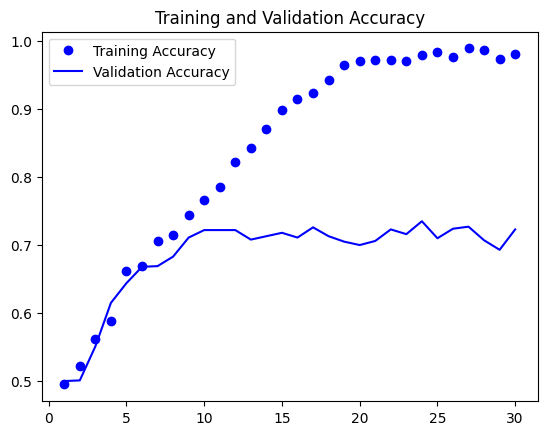

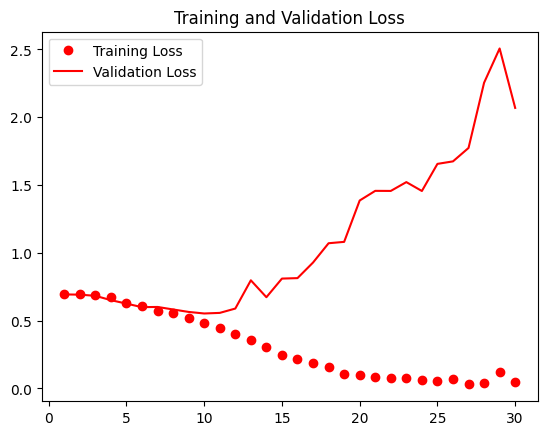

In [13]:
plt.plot(range(1,31), history.history['accuracy'],'bo',label='Training Accuracy')
plt.plot(range(1,31), history.history['val_accuracy'],'b', label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.figure()
plt.plot(range(1,31), history.history['loss'],'ro', label='Training Loss')
plt.plot(range(1,31), history.history['val_loss'],'r', label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [14]:
test_model=keras.models.load_model("conv_from_scratch.keras")
test_loss, test_acc=test_model.evaluate(test_set)
print(f"Test Accuracy:{test_acc:.3f}")

63/63 [==============================] - 2s 33ms/step - loss: 0.5760 - accuracy: 0.7115
Test Accuracy:0.711


In [15]:
data_augmentation= keras.Sequential(
    [
      keras.layers.RandomFlip('horizontal'),
      keras.layers.RandomRotation(0.1),
      keras.layers.RandomZoom(0.2)
    ]
)

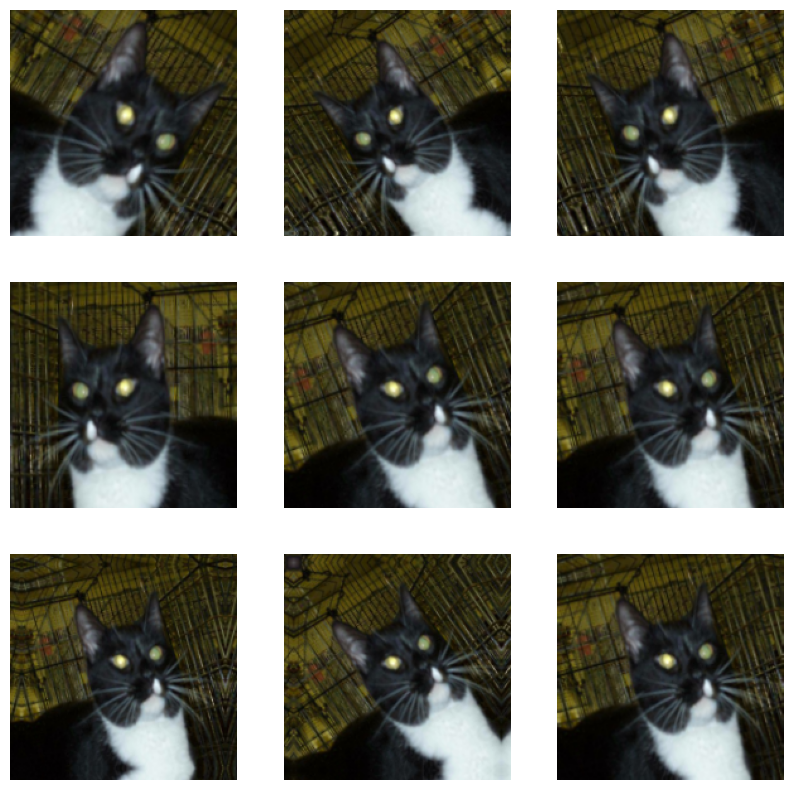

In [16]:
plt.figure(figsize=(10,10))
for image, _ in train_set.take(35):
  for i in range(9):
    data_augmented=data_augmentation(image)
    ax=plt.subplot(3,3, i+1)
    plt.imshow(data_augmented[0].numpy().astype('uint8'))
    plt.axis("off")

In [17]:
input=keras.Input(shape=(180,180,3))
x=data_augmentation(input)
x=keras.layers.Rescaling(1./255)(x)
x=keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x=keras.layers.MaxPooling2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dropout(0.5)(x)
output=keras.layers.Dense(1, activation='sigmoid')(x)
model=keras.Model(input, output)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [18]:
calbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath="conv_with_augmentation.keras",
        save_best_only=True,
        monitor='val_loss'
    )
]

In [ ]:
history=model.fit(train_set, epochs=100, validation_data=validation_set,callbacks=calbacks)

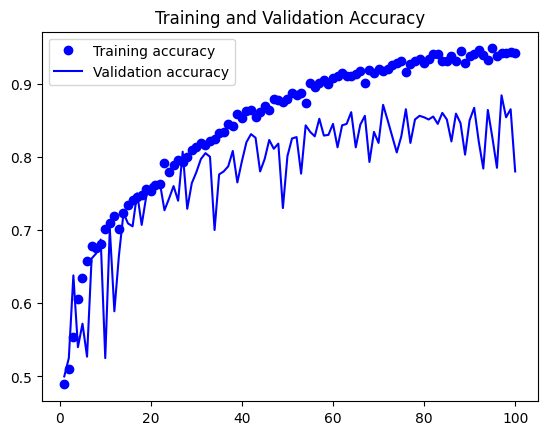

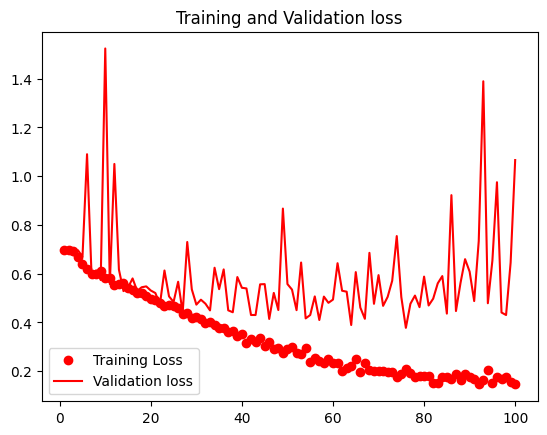

In [27]:
plt.plot(range(1,101),history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(range(1,101),history.history['val_accuracy'],'b', label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(range(1,101), history.history['loss'], 'ro', label='Training Loss')
plt.plot(range(1,101), history.history['val_loss'],'r', label="Validation loss")
plt.legend()
plt.title("Training and Validation loss")
plt.show()

In [ ]:
test_model = keras.models.load_model(
 "conv_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

In [21]:
conv_base=keras.applications.vgg16.VGG16(include_top=False, weights='imagenet')

In [22]:
conv_base.trainable=False

In [23]:
data_augmentation=keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.2)
    ]
)

In [26]:
input=keras.Input(shape=(180,180,3))
x=data_augmentation(input)
x=keras.applications.vgg16.preprocess_input(x)
x=conv_base(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dropout(0.5)(x)
output=keras.layers.Dense(1, activation='sigmoid')(x)
model=keras.Model(input, output)
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
callback=[
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extracion_with_data_augment.keras',
        monitor='val_loss',
        save_best_only=True
    )
]

Epoch 1/30
63/63 [==============================] - 10s 153ms/step - loss: 0.6094 - accuracy: 0.9705 - val_loss: 0.8043 - val_accuracy: 0.9800
Epoch 2/30
63/63 [==============================] - 12s 184ms/step - loss: 0.3399 - accuracy: 0.9785 - val_loss: 0.7397 - val_accuracy: 0.9830
Epoch 3/30
63/63 [==============================] - 10s 150ms/step - loss: 0.5647 - accuracy: 0.9785 - val_loss: 0.7373 - val_accuracy: 0.9790
Epoch 4/30
63/63 [==============================] - 11s 177ms/step - loss: 0.4762 - accuracy: 0.9785 - val_loss: 0.8266 - val_accuracy: 0.9750
Epoch 5/30
63/63 [==============================] - 10s 146ms/step - loss: 0.5405 - accuracy: 0.9760 - val_loss: 0.8934 - val_accuracy: 0.9730
Epoch 6/30
63/63 [==============================] - 10s 151ms/step - loss: 0.5513 - accuracy: 0.9785 - val_loss: 0.8430 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 10s 157ms/step - loss: 0.5578 - accuracy: 0.9740 - val_loss: 0.9787 - val_accuracy: 0.9780

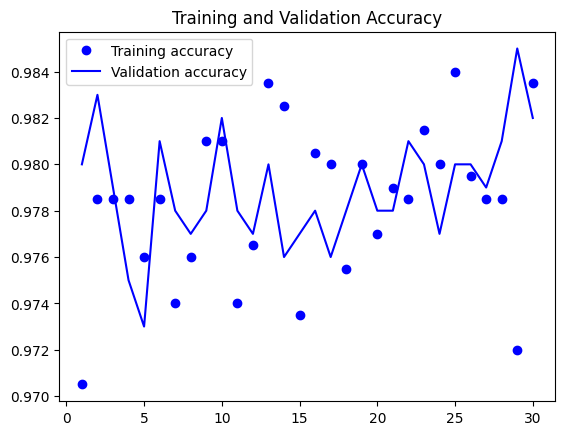

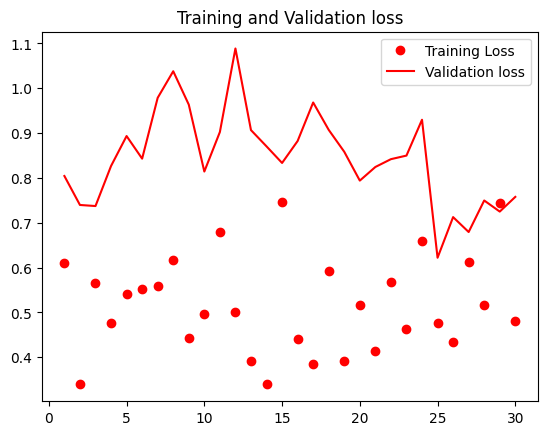

In [30]:
history=model.fit(train_set, epochs=30, validation_data=validation_set, callbacks=callback)

plt.plot(range(1,31),history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(range(1,31),history.history['val_accuracy'],'b', label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(range(1,31), history.history['loss'], 'ro', label='Training Loss')
plt.plot(range(1,31), history.history['val_loss'],'r', label="Validation loss")
plt.legend()
plt.title("Training and Validation loss")
plt.show()

In [31]:
 test_model=keras.models.load_model('feature_extracion_with_data_augment.keras')

In [32]:
test_loss, test_acc=test_model.evaluate(test_set)
print(f"Test Accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 94ms/step - loss: 0.5585 - accuracy: 0.9740
Test Accuracy: 0.974


In [33]:
conv_base.trainable=True
for layer in conv_base.layers[:-4]:
  layer.trainable=False

In [34]:
input=keras.Input(shape=(180, 180,3))
x=data_augmentation(input)
x=keras.applications.vgg16.preprocess_input(x)
x=conv_base(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dropout(0.5)(x)
output=keras.layers.Dense(1, activation='sigmoid')(x)
model=keras.Model(input, output)

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
calbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath='fine-tuning.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

Epoch 1/30
63/63 [==============================] - 16s 191ms/step - loss: 4.1970 - accuracy: 0.6035 - val_loss: 0.9947 - val_accuracy: 0.8100
Epoch 2/30
63/63 [==============================] - 13s 209ms/step - loss: 1.1668 - accuracy: 0.7545 - val_loss: 0.3904 - val_accuracy: 0.8840
Epoch 3/30
63/63 [==============================] - 12s 184ms/step - loss: 0.6131 - accuracy: 0.8085 - val_loss: 0.2190 - val_accuracy: 0.9200
Epoch 4/30
63/63 [==============================] - 12s 179ms/step - loss: 0.4009 - accuracy: 0.8555 - val_loss: 0.1713 - val_accuracy: 0.9350
Epoch 5/30
63/63 [==============================] - 13s 198ms/step - loss: 0.2783 - accuracy: 0.8885 - val_loss: 0.1435 - val_accuracy: 0.9470
Epoch 6/30
63/63 [==============================] - 11s 171ms/step - loss: 0.2885 - accuracy: 0.8860 - val_loss: 0.1342 - val_accuracy: 0.9550
Epoch 7/30
63/63 [==============================] - 11s 173ms/step - loss: 0.2226 - accuracy: 0.9085 - val_loss: 0.1203 - val_accuracy: 0.9620

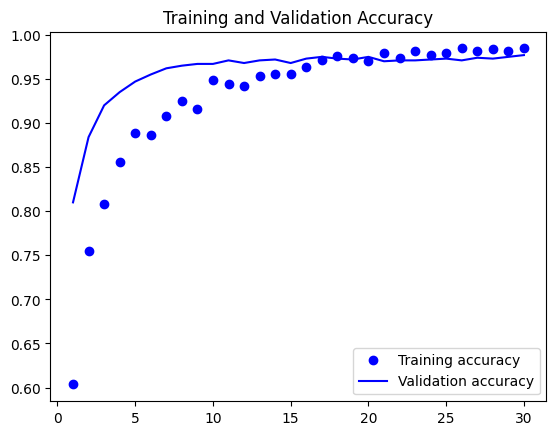

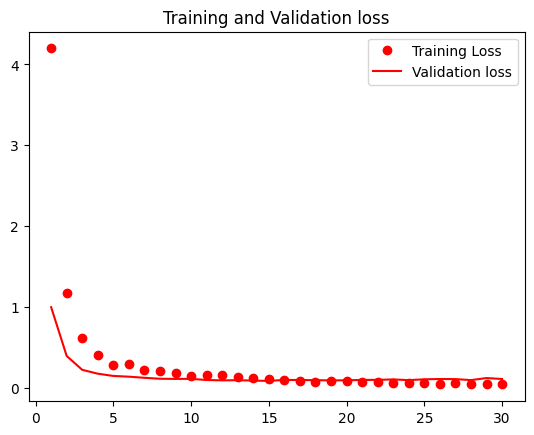

In [36]:
history=model.fit(train_set, epochs=30, validation_data=validation_set, callbacks=calbacks)

plt.plot(range(1,31),history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(range(1,31),history.history['val_accuracy'],'b', label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(range(1,31), history.history['loss'], 'ro', label='Training Loss')
plt.plot(range(1,31), history.history['val_loss'],'r', label="Validation loss")
plt.legend()
plt.title("Training and Validation loss")
plt.show()

In [39]:
test_model=keras.models.load_model("fine-tuning.keras")
test_loss, test_acc=test_model.evaluate(test_set)
print(f"Test Accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 94ms/step - loss: 0.1146 - accuracy: 0.9625
Test Accuracy: 0.962
